# Taller evaluable sobre la extracción, transformación y visualización de datos usando IPython

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia 

# Instrucciones

En la carpeta 'Taller' del repositorio 'ETVL-IPython' se encuentran los archivos 'Precio_Bolsa_Nacional_($kwh)_'*'.xls' en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada resuelva los siguientes puntos usando el lenguaje de programación Python. 

# Preguntas

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Imprima el encabezamiento de la tabla usando `head()`. 

In [86]:
import pandas as pd
x = []
for n in range(1995,2018):
        if n < 2000:
            skip = 3
        else:
            skip = 2            
        nombre_archivo = 'Precio_Bolsa_Nacional_($kwh)_' + str(n)
        if n >= 2016:
            nombre_archivo += '.xls'
        else:
            nombre_archivo += '.xlsx'
        y = pd.read_excel(nombre_archivo, skiprows=skip, parse_cols=24)
        x.append(y)
z = pd.concat(x)
print(z.head())
print(z.tail())
#print(y.head())

        Fecha      0      1      2      3      4      5      6      7      8  \
0  1995-07-20    NaN  1.073  1.073  1.073  1.073  1.073  1.073  1.073  1.074   
1  1995-07-21  1.073  1.000  1.000  1.000  1.000  1.000  5.000  6.000  6.000   
2  1995-07-22  1.073  1.073  1.000  1.000  1.000  1.073  1.303  1.303  1.303   
3  1995-07-23  1.073  1.000  1.000  1.000  1.000  1.000  0.100  1.000  1.000   
4  1995-07-24  1.000  1.000  0.990  1.000  1.000  1.073  3.000  3.000  3.000   

   ...       14     15     16     17      18      19      20     21     22  \
0  ...    1.073  1.073  1.073  1.073   1.074   1.897   1.897  1.897  1.073   
1  ...    5.000  1.000  1.000  5.000  12.000  16.670  11.929  5.000  1.000   
2  ...    1.073  1.000  1.000  1.000   1.303   2.500   2.500  1.303  1.073   
3  ...    1.000  0.100  0.100  1.000   1.238   1.238   1.238  1.238  1.073   
4  ...    1.073  1.073  3.000  2.000  18.630  22.500   9.256  3.000  1.073   

      23  
0  1.073  
1  1.000  
2  1.073  
3  1.0

**2.--** Compute e imprima el número de registros con datos faltantes.

In [87]:
y = z.dropna()
len(z) - len(y)

28

**3.--** Compute e imprima el número de registros duplicados.

In [88]:
#Númeo de registros duplicados eliminando de la tabla (z) los registros con datos faltantes (tabla y)
w = y.drop_duplicates()
len(y) - len(w)

59

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [89]:
y = z.dropna()
w = y.drop_duplicates()
len(w)

7875

**5.--** Compute y grafique el precio primedio diario.

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [91]:
Prom = w.mean(axis=1)
w['Promedio'] = Prom
w.head()

C:\Users\Adriana Arango\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Fecha,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,Promedio
1,1995-07-21,1.073,1.000,1.000,1.00,1.00,1.000,5.000,6.000,6.000,...,1.000,1.000,5.000,12.000,16.670,11.929,5.000,1.000,1.000,4.924333
2,1995-07-22,1.073,1.073,1.000,1.00,1.00,1.073,1.303,1.303,1.303,...,1.000,1.000,1.000,1.303,2.500,2.500,1.303,1.073,1.073,1.269500
3,1995-07-23,1.073,1.000,1.000,1.00,1.00,1.000,0.100,1.000,1.000,...,0.100,0.100,1.000,1.238,1.238,1.238,1.238,1.073,1.000,0.953083
4,1995-07-24,1.000,1.000,0.990,1.00,1.00,1.073,3.000,3.000,3.000,...,1.073,3.000,2.000,18.630,22.500,9.256,3.000,1.073,1.000,4.305917
5,1995-07-25,0.990,0.990,0.989,0.99,0.99,1.073,1.263,1.263,1.263,...,1.073,1.073,1.073,1.263,1.500,1.263,1.263,1.073,0.990,1.149167


In [92]:
w['Fecha'] = pd.to_datetime(w['Fecha'])

C:\Users\Adriana Arango\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


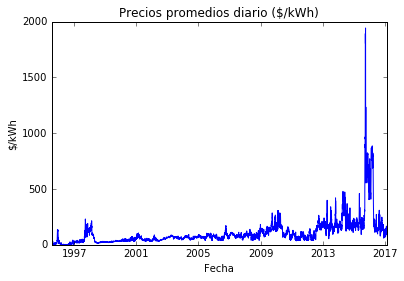

In [93]:
#Gráfica precios promedios por día
GrafProm = plt.plot(w['Fecha'],w['Promedio'])
plt.ylabel('$/kWh')
plt.xlabel('Fecha')
plt.title('Precios promedios diario ($/kWh)')
plt.show()

**6.--** Compute y grafique el precio máximo por mes.

In [94]:
Max = w.max(axis=1)
w['Máximo'] = Max
w.head()


C:\Users\Adriana Arango\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Fecha,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,Promedio,Máximo
1,1995-07-21,1.073,1.000,1.000,1.00,1.00,1.000,5.000,6.000,6.000,...,1.000,5.000,12.000,16.670,11.929,5.000,1.000,1.000,4.924333,16.670
2,1995-07-22,1.073,1.073,1.000,1.00,1.00,1.073,1.303,1.303,1.303,...,1.000,1.000,1.303,2.500,2.500,1.303,1.073,1.073,1.269500,2.500
3,1995-07-23,1.073,1.000,1.000,1.00,1.00,1.000,0.100,1.000,1.000,...,0.100,1.000,1.238,1.238,1.238,1.238,1.073,1.000,0.953083,1.238
4,1995-07-24,1.000,1.000,0.990,1.00,1.00,1.073,3.000,3.000,3.000,...,3.000,2.000,18.630,22.500,9.256,3.000,1.073,1.000,4.305917,22.500
5,1995-07-25,0.990,0.990,0.989,0.99,0.99,1.073,1.263,1.263,1.263,...,1.073,1.073,1.263,1.500,1.263,1.263,1.073,0.990,1.149167,1.500


In [95]:
b = []
for n in range (len(w['Fecha'])):
    b.append(str(w.iloc[n,0])[0:7])
w['Año-Mes'] = b
w.head()

C:\Users\Adriana Arango\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Fecha,0,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,Promedio,Máximo,Año-Mes
1,1995-07-21,1.073,1.000,1.000,1.00,1.00,1.000,5.000,6.000,6.000,...,5.000,12.000,16.670,11.929,5.000,1.000,1.000,4.924333,16.670,1995-07
2,1995-07-22,1.073,1.073,1.000,1.00,1.00,1.073,1.303,1.303,1.303,...,1.000,1.303,2.500,2.500,1.303,1.073,1.073,1.269500,2.500,1995-07
3,1995-07-23,1.073,1.000,1.000,1.00,1.00,1.000,0.100,1.000,1.000,...,1.000,1.238,1.238,1.238,1.238,1.073,1.000,0.953083,1.238,1995-07
4,1995-07-24,1.000,1.000,0.990,1.00,1.00,1.073,3.000,3.000,3.000,...,2.000,18.630,22.500,9.256,3.000,1.073,1.000,4.305917,22.500,1995-07
5,1995-07-25,0.990,0.990,0.989,0.99,0.99,1.073,1.263,1.263,1.263,...,1.073,1.263,1.500,1.263,1.263,1.073,0.990,1.149167,1.500,1995-07


In [96]:
MaxMes = w.groupby('Año-Mes').max()
MaxMes = MaxMes.max(axis=1)
MaxMes.head()

Año-Mes
1995-07     22.500
1995-08     40.000
1995-09     40.572
1995-10     33.700
1995-11    111.907
dtype: float64

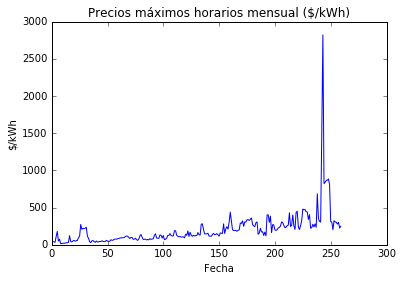

In [97]:
#Gráfica Precios máximos horarios por mes ($/kWh)
GrafMax = plt.plot(range(len(MaxMes)),MaxMes)
plt.ylabel('$/kWh')
plt.xlabel('Fecha')
plt.title('Precios máximos horarios mensual ($/kWh)')
plt.show()

**7.--** Compute y grafique el precio mínimo mensual.


In [98]:
MinMes = w.groupby('Año-Mes').min()
MinMes = MinMes.min(axis=1)
MinMes.head()

Año-Mes
1995-07    0.000
1995-08    0.000
1995-09    1.073
1995-10    0.000
1995-11    1.072
dtype: float64

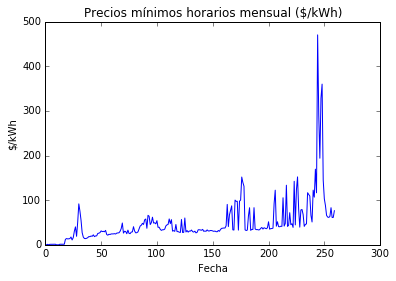

In [99]:
#Gráfica Precios mínimos horarios por mes ($/kWh)
GrafMax = plt.plot(range(len(MinMes)),MinMes)
plt.ylabel('$/kWh')
plt.xlabel('Fecha')
#plt.axis(['1995-07', '2017-02'])
plt.title('Precios mínimos horarios mensual ($/kWh)')
plt.show()

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

In [100]:
PromMes = w.groupby('Año-Mes').mean()
PromMes = PromMes.mean(axis=1)
PromMes.head()
PromMes

Año-Mes
1995-07       1.723059
1995-08       7.275746
1995-09      11.215258
1995-10      10.756155
1995-11      27.899621
1995-12      70.164350
1996-01      23.575689
1996-02       8.376256
1996-03       3.598592
1996-04       3.296864
1996-05       2.110192
1996-06       2.137085
1996-07       1.832870
1996-08       4.238908
1996-09      16.155494
1996-10       6.077479
1996-11      21.077061
1996-12      15.155813
1997-01      22.002194
1997-02      27.475974
1997-03      26.325731
1997-04      25.893393
1997-05      36.049443
1997-06      33.991433
1997-07      33.031841
1997-08      39.650473
1997-09     140.724931
1997-10     138.900203
1997-11     133.456489
1997-12     129.820913
              ...     
2014-09     178.457204
2014-10     209.058593
2014-11     167.348191
2014-12     175.943139
2015-01     188.894473
2015-02     167.428081
2015-03     206.602047
2015-04     162.793497
2015-05     261.767780
2015-06     188.376923
2015-07     208.091286
2015-08     185.654810
201

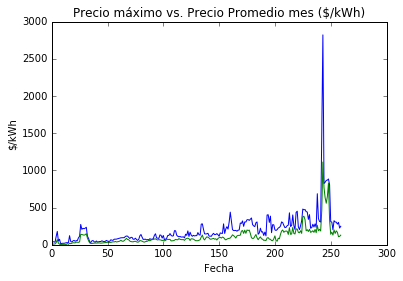

In [102]:
#Gráfica Precios mínimos horarios por mes ($/kWh)
GrafMax = plt.plot(range(len(MaxMes)),MaxMes)
GrafProm = plt.plot(range(len(PromMes)),PromMes)
plt.ylabel('$/kWh')
plt.xlabel('Fecha')
plt.title('Precio máximo vs. Precio Promedio mes ($/kWh)')
plt.show()

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

C:\Users\Adriana Arango\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


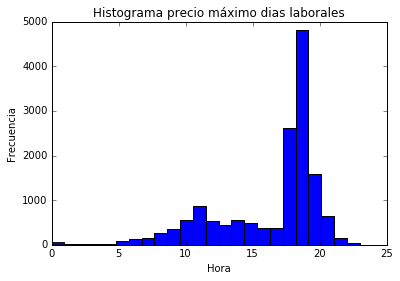

In [103]:
dia = [1,2,3,1,1,1,1]*int(len(w)/7)
w["dia"]=dia
lab = w[w["dia"]==1]
labind=["line_{}".format(n) for n in range(len(lab))]
lab.index=labind
wmaxhist=[]
wmaxhist1=[]
contar = []  
for n in range(len(lab)):
    wmaxhist1=pd.Series(lab.loc["line_"+str(n)]).values[1:25]
    wmaxhist.append ([i for i,e in enumerate(wmaxhist1) if e == max(wmaxhist1)])
contar = []
for n in range (len(lab)):
    for i in range (len(wmaxhist[n])):
        contar.append(wmaxhist[n][i])
plt.hist(contar, bins =24)
plt.xlabel("Hora")
plt.ylabel("Frecuencia")
plt.title("Histograma precio máximo dias laborales")

    

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

C:\Users\Adriana Arango\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


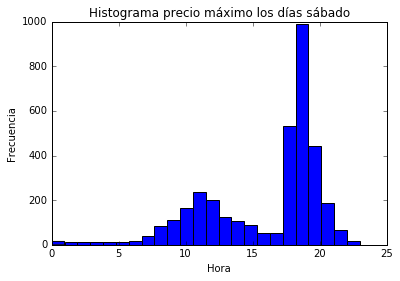

In [104]:
dia = [1,2,3,1,1,1,1]*int(len(w)/7)
w["dia"]=dia
lab = w[w["dia"]==2]
labind=["line_{}".format(n) for n in range(len(lab))]
lab.index=labind
wmaxhist=[]
wmaxhist1=[]
contar = []  
for n in range(len(lab)):
    wmaxhist1=pd.Series(lab.loc["line_"+str(n)]).values[1:25]
    wmaxhist.append ([i for i,e in enumerate(wmaxhist1) if e == max(wmaxhist1)])
contar = []
for n in range (len(lab)):
    for i in range (len(wmaxhist[n])):
        contar.append(wmaxhist[n][i])
plt.hist(contar, bins =24)
plt.xlabel("Hora")
plt.ylabel("Frecuencia")
plt.title("Histograma precio máximo los días sábado")

    

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

C:\Users\Adriana Arango\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


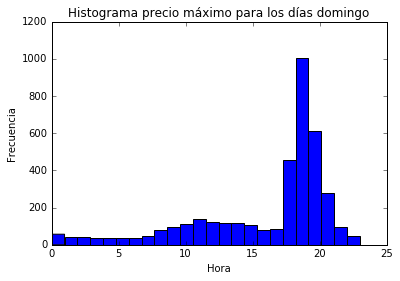

In [105]:
dia = [1,2,3,1,1,1,1]*int(len(w)/7)
w["dia"]=dia
lab = w[w["dia"]==3]
labind=["line_{}".format(n) for n in range(len(lab))]
lab.index=labind
wmaxhist=[]
wmaxhist1=[]
contar = []  
for n in range(len(lab)):
    wmaxhist1=pd.Series(lab.loc["line_"+str(n)]).values[1:25]
    wmaxhist.append ([i for i,e in enumerate(wmaxhist1) if e == max(wmaxhist1)])
contar = []
for n in range (len(lab)):
    for i in range (len(wmaxhist[n])):
        contar.append(wmaxhist[n][i])
plt.hist(contar, bins =24)
plt.xlabel("Hora")
plt.ylabel("Frecuencia")
plt.title("Histograma precio máximo para los días domingo")

    

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [106]:
a = []
for n in range (len(w)):
    a.append(str(w.iloc[n,0])[0:4])
w['Año'] = a
MinAño = w.groupby('Año').min()
MinAño = MinAño.min(axis=1)

MinAño


C:\Users\Adriana Arango\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Año
1995    0
1996    0
1997    1
1998    1
1999    1
2000    1
2001    1
2002    1
2003    1
2004    1
2005    1
2006    1
2007    1
2008    1
2009    1
2010    1
2011    1
2012    1
2013    1
2014    1
2015    1
2016    1
2017    1
dtype: float64

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

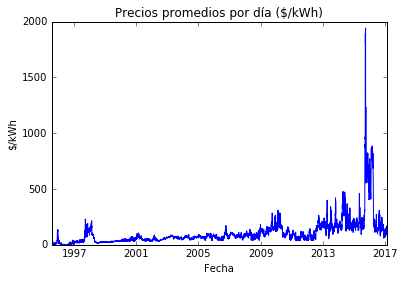

In [135]:
#Gráfica precios promedios por día
GrafProm = plt.plot(w['Fecha'],w['Promedio'])
plt.ylabel('$/kWh')
plt.xlabel('Fecha')
plt.title('Precios promedios por día ($/kWh)')
plt.show()